In [1]:
from modules import Kraken
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
constructor = Kraken(pair = 'BTC/EUR', api_key_file = 'kraken.key')

In [3]:
df_ssl, df_ema = constructor.historical_data(interval_ssl = 60, bars_ssl = 100, period_ssl = 10, 
                                             interval_ema = 5, bars_ema = 200, period_ema = 50)

In [6]:
resistance_line = df_ssl['close'].max()
support_line = df_ssl['close'].min()

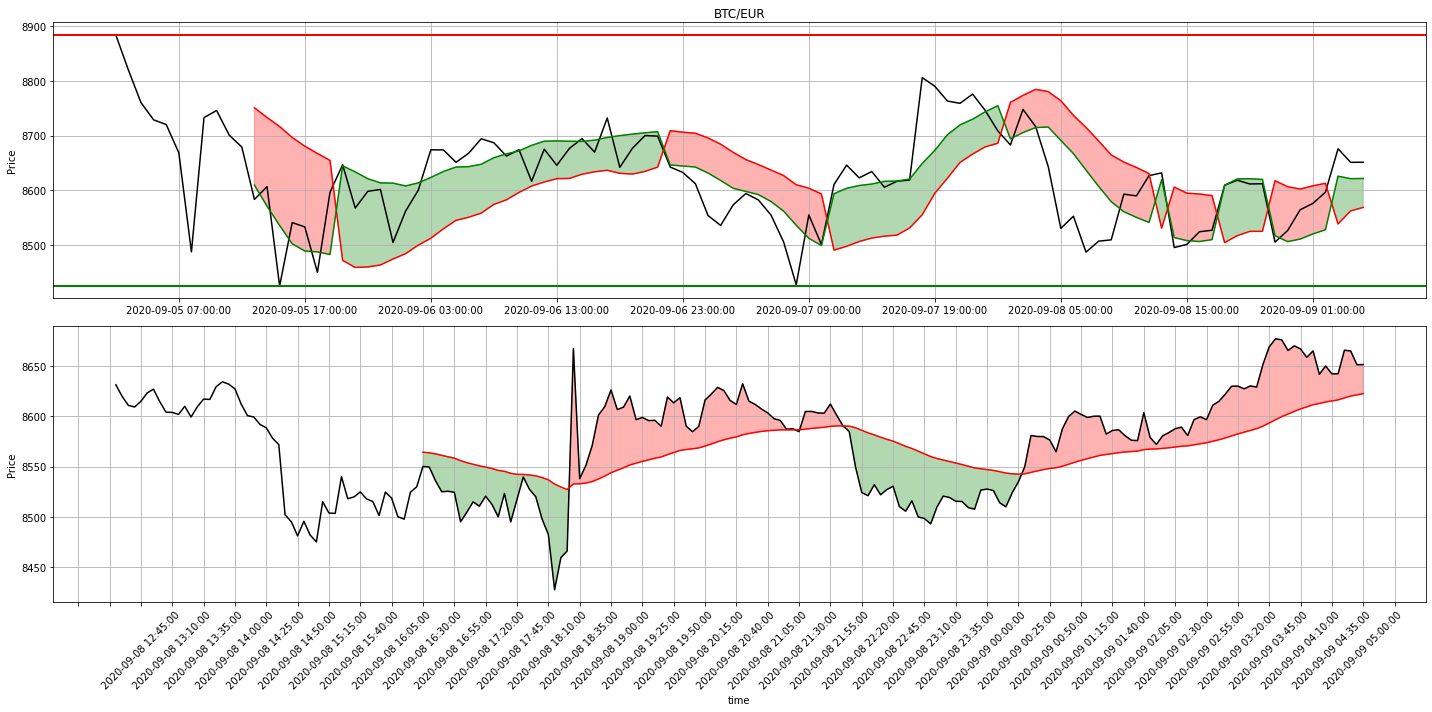

In [16]:
# Create figure and plot space
fig, ax = plt.subplots(2, 1,figsize=(20, 10))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
# Add x-axis and y-axis
ax[0].plot(df_ssl.close,
        color='k')
ax[0].plot(df_ssl.red,lw=1.5,
        color='red')
ax[0].plot(df_ssl.green,lw=1.5,
        color='green')

# Set title and labels for axes
ax[0].axhline(y = resistance_line, lw = 2, color = 'red')
ax[0].axhline(y = support_line, lw = 2, color = 'green')

ax[1].plot(df_ema.close,
        color='k')
ax[1].plot(df_ema.ema50,lw=1.5,
        color='red')

ax[0].fill_between(df_ssl.index, df_ssl.green, df_ssl.red, color = 'green',
                   where = (df_ssl.red <= df_ssl.green),alpha=0.3, interpolate=True)

ax[0].fill_between(df_ssl.index, df_ssl.green, df_ssl.red, color = 'red',
                   where = (df_ssl.red >= df_ssl.green),alpha=0.3, interpolate=True)


ax[1].fill_between(df_ema.index, df_ema.close, df_ema.ema50, color = 'green',
                   where = (df_ema.close <= df_ema.ema50),alpha=0.3, interpolate=True)

ax[1].fill_between(df_ema.index, df_ema.close, df_ema.ema50, color = 'red',
                   where = (df_ema.close >= df_ema.ema50),alpha=0.3, interpolate=True)


ax[1].set(xlabel="time", ylabel="Price")

ax[0].set(title='BTC/EUR', ylabel="Price")

plt.setp(ax[1].get_xticklabels(), rotation=45)
ax[0].grid(True)
ax[1].grid(True)

ax[1].xaxis.set_major_locator(mdates.DayLocator(interval=5)) 
ax[0].xaxis.set_major_locator(mdates.DayLocator(interval=10)) 

fig.tight_layout()
plt.show();